# Stage 13 Homework Starter — Productization

## Objective
Deploy your trained model as a **reusable, handoff-ready API or dashboard** and finalize your project for reproducibility and clarity.

## Importing neccessary packages

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import joblib
import os,sys
import pandas as pd
sys.path.append(os.path.abspath(".."))

# Now imports from src should work
from src.utils import (
    calculate_metrics,
    predict
)

## 1. Create mock, very basic analysis

In [ ]:
# Create folders if they don't exist
os.makedirs('model', exist_ok=True)

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Train a basic model
model = LinearRegression()
model.fit(X, y)

# Save the model to disk
joblib.dump(model, '../model/model.pkl')

# Test that it works
print("Test prediction:", model.predict([[0.1, 0.2,0.1,0.3,0.4]]))

Test prediction: [63.6057849]


## 2. Notebook Cleanup
data is already clean since i generated no nan values in the synthetic data and now we are importing the saved model to predict on the given values

In [3]:
loaded_model = joblib.load('../model/model.pkl')
print("Reloaded model prediction:", loaded_model.predict([[0.1, 0.2,0.1,0.3,0.4]]))

Reloaded model prediction: [63.6057849]


## 3. Move reusable functions to /src/


In [4]:
feature_cols = [f"feature_{i+1}" for i in range(X.shape[1])]

# Combine X and y into a DataFrame
df = pd.DataFrame(X, columns=feature_cols)
df["target"] = y

In [5]:
print("Function test:", predict([0.1, 0.2,0.1,0.3,0.4], round_prediction=True))
print("Describe:",calculate_metrics(df))

Function test: 63.61
Describe:         feature_1   feature_2   feature_3   feature_4   feature_5      target
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.032202    0.128058   -0.044747    0.076954   -0.093874    8.840707
std      1.072806    0.959556    0.900352    0.984110    0.983943  140.610938
min     -2.619745   -1.913280   -1.952088   -2.301921   -3.241267 -341.184598
25%     -0.757046   -0.536288   -0.734897   -0.678136   -0.700307  -83.644779
50%     -0.145714    0.152465   -0.010110    0.066421   -0.024662    4.862078
75%      0.648170    0.667929    0.524237    0.830645    0.532419  106.949137
max      3.852731    3.078881    2.314659    1.886186    2.122156  399.561141


## 5. Pickle / Save Final Model

### TODO: Replace this with your trained model

In [6]:
import pickle
with open('../model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('../model/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example prediction (replace with actual features)
print(loaded_model.predict([[0.1, 0.2,0.1,0.3,0.4]]))

[63.6057849]


## 6. Flask API Starter



In [ ]:
from flask import Flask, request, jsonify
import threading
import matplotlib.pyplot as plt
import io
import base64

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # TODO: Replace placeholder logic with actual model prediction
    data = request.get_json()
    features = data.get('features', None)
    if features is None:
        return jsonify({'error': 'No features provided'}), 400
    pred = sum(features)  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>', methods=['GET'])
def predict_one(input1):
    pred = input1 * 2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>/<float:input2>', methods=['GET'])
def predict_two(input1, input2):
    pred = input1 + input2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/plot')
def plot():
    # TODO: Replace with meaningful chart or image
    fig, ax = plt.subplots()
    ax.plot([0, 1, 2], [0, 1, 4])
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_bytes = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{img_bytes}"/>'

def run_flask():
    app.run(port=5000)

# Launch Flask in a separate thread
threading.Thread(target=run_flask).start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Aug/2025 01:42:38] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 01:42:38] "GET /predict/2.0 HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 01:42:38] "GET /predict/1.0/3.0 HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 01:42:39] "GET /plot HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 01:43:43] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 01:43:43] "GET /predict/2.0 HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 01:43:43] "GET /predict/1.0/3.0 HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 01:43:44] "GET /plot HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 01:44:24] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [28/Aug/2025 01:44:24] "GET /favicon.ico HTTP/1.1" 404 -


## 7. Testing the Flask API from Notebook

### TODO: Modify examples with your actual features

{'prediction': 1.5}
{'prediction': 4.0}
{'prediction': 4.0}



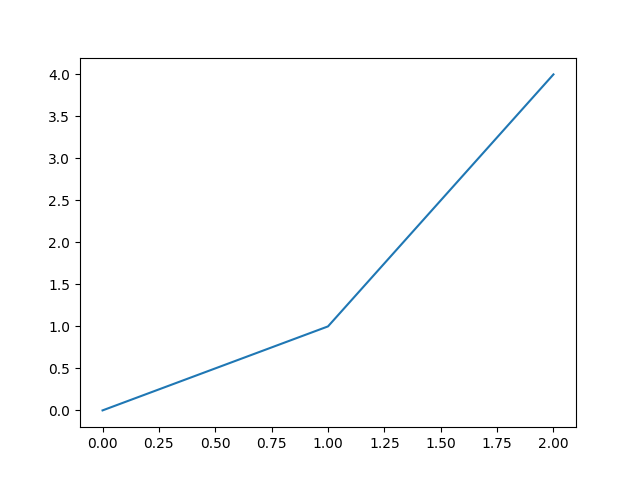

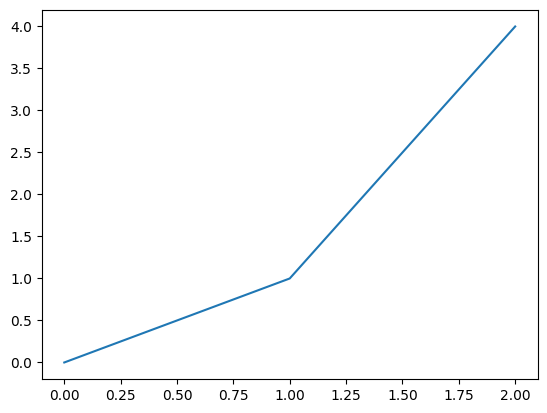

In [9]:
import requests
from IPython.display import display, HTML

# POST /predict
response = requests.post(
    'http://127.0.0.1:5000/predict',
    json={'features':[0.2, 0.3, 0.2,0.1,0.3,0.4]}
)
print(response.json())

# GET /predict/<input1>
response2 = requests.get('http://127.0.0.1:5000/predict/2.0')
print(response2.json())

# GET /predict/<input1>/<input2>
response3 = requests.get('http://127.0.0.1:5000/predict/1.0/3.0')
print(response3.json())

# GET /plot
response_plot = requests.get('http://127.0.0.1:5000/plot')
display(HTML(response_plot.text))